In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
mean_1 = np.array([12, -19])
mean_2 = np.array([-10, 20])

In [3]:
cov_1 = np.array([[1, 15],[15, 1]])
cov_2 = np.array([[1, 10],[10, 1]])
# Covariance -> means how much by amount is it spreading

In [4]:
dist_1 = np.random.multivariate_normal(mean_1, cov_1, size = 1000) 
dist_2 = np.random.multivariate_normal(mean_2, cov_2, size = 1000)  
# Multivariant means distribution with more than 1 dimension

C:\Users\prajwal\AppData\Local\Temp\ipykernel_16132\1743241178.py:1: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  dist_1 = np.random.multivariate_normal(mean_1, cov_1, size = 1000)
C:\Users\prajwal\AppData\Local\Temp\ipykernel_16132\1743241178.py:2: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  dist_2 = np.random.multivariate_normal(mean_2, cov_2, size = 1000)


In [5]:
dist_1.shape, dist_2.shape

((1000, 2), (1000, 2))

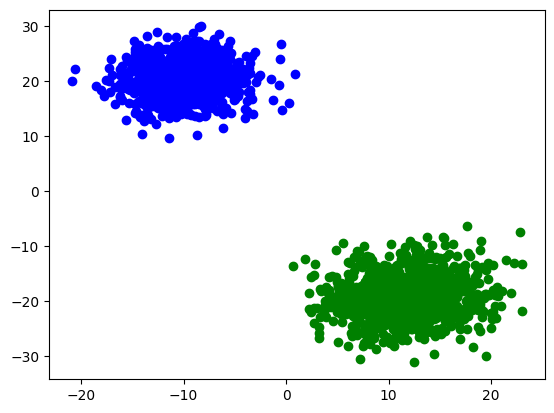

In [6]:
plt.scatter(dist_1[:,0], dist_1[:, 1], c = 'green')
plt.scatter(dist_2[:,0], dist_2[:, 1], c = 'blue')

In [7]:
# When we require two types of variances with the type of equation
# that is why in multidimension we do not say variance, we say co-variance
# [0,0] represents relation of x-axis with x-axis,
# [0,1] represents relation of x-axis with y-axis,
# [1,0] represents relation of y-axis with x-axis,
# [1,1] represents relation of y-axis with y-axis.

In [8]:
dataset = np.zeros((2000,3))

dataset[:1000, :-1] = dist_1
dataset[1000:, :-1] = dist_2
dataset[:1000, -1] = 1 # output

In [9]:
u = np.mean(dataset[:, :-1], axis = 0)
std = np.std(dataset[:, :-1], axis = 0)
dataset[:, :-1] = (dataset[:, :-1] - u)/std

In [10]:
ones = np.ones((dataset.shape[0], 1))
dataset = np.hstack((ones, dataset))

In [11]:
np.random.shuffle(dataset)

In [12]:
print(dataset[:10])

[[ 1.          0.74837367 -0.74741031  1.        ]
 [ 1.          0.31187986 -1.0844275   1.        ]
 [ 1.         -0.80300079  0.80377865  0.        ]
 [ 1.          0.91248579 -0.97775784  1.        ]
 [ 1.         -1.04976893  1.02139743  0.        ]
 [ 1.          1.05082949 -1.05327275  1.        ]
 [ 1.          1.45562968 -1.19138026  1.        ]
 [ 1.         -1.05238041  0.6938612   0.        ]
 [ 1.         -1.37769406  0.75829938  0.        ]
 [ 1.          0.89963728 -1.22352837  1.        ]]


In [13]:
split = 0.8

train_X = dataset[:int(split * dataset.shape[0]), :-1]
test_X = dataset[int(split * dataset.shape[0]):, :-1]
train_Y = dataset[:int(split * dataset.shape[0]), -1]
test_Y = dataset[int(split * dataset.shape[0]):, -1]

In [14]:
print(train_X.shape, test_X.shape, train_Y.shape, test_Y.shape)

(1600, 3) (400, 3) (1600,) (400,)


In [15]:
def hypothesis(X, weights):
    return 1 / (1+np.exp(-1*np.dot(X, weights)))

In [16]:
def loss_func (X, weights, Y):
    Y_pred = hypothesis(X,weights)
    loss = np.mean(Y * np.log(Y_pred) + (1-Y) * np.log(1-Y_pred))
    return -1 * loss

In [17]:
def gradient(X, Y, weight):
    y_pred = hypothesis(X, weight)
    grad = np.dot(X.T, (Y - y_pred))
    
    return grad/X.shape[0]

In [18]:
def gradient_descent(X, Y):
    weights = np.zeros((X.shape[1], ))
    lr_rate = 0.03
    loss_epoch = []

    epochs = 10000
    
    for i in range(epochs):
        grad = gradient(X, Y, weights)
        loss_epoch.append(loss_func(X, weights, Y))
        weights = weights + lr_rate * grad

    return weights, loss_epoch

In [19]:
import time
start = time.time()
weights, loss_epoch = gradient_descent(train_X, train_Y)
print(time.time() - start)

0.8401811122894287


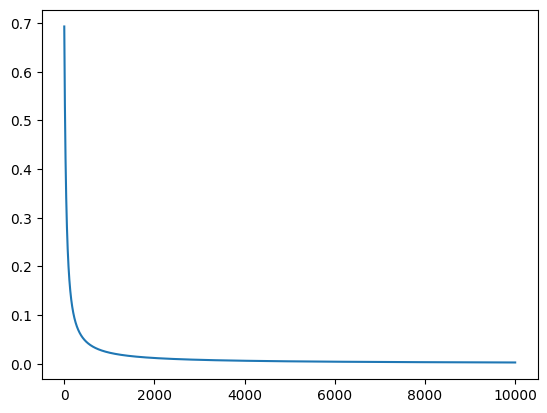

In [20]:
plt.plot(loss_epoch)

In [21]:
loss_epoch[:5]

[0.6931471805599452,
 0.679340806722205,
 0.6659273075429089,
 0.6528952933390366,
 0.6402335566782485]

In [22]:
# whenerver our loss comes, 1st Loss is this only.

In [23]:
weights

array([ 0.06268324,  3.15252786, -3.67679218])

In [24]:
X = np.arange(-20, 30)
Y = -(weights[1] * X + weights[0])/weights[2]

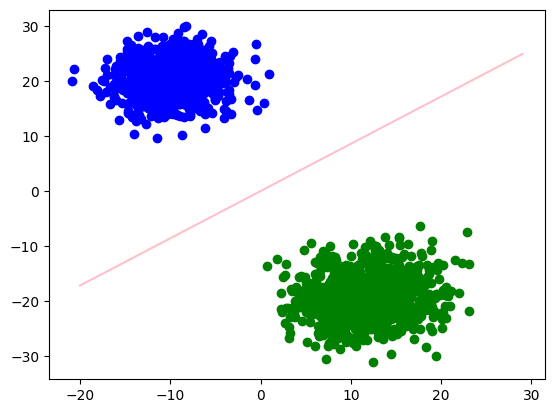

In [25]:
plt.scatter(dist_1[:, 0], dist_1[:, 1], c = 'green')
plt.scatter(dist_2[:, 0], dist_2[:, 1], c = 'blue')
plt.plot(X, Y, color = 'pink')

In [26]:
def predict(X, weights):
    pred = hypothesis(X, weights)
    print(pred)
    if pred > 0.5:
        return 1
    else:
        return 0

In [27]:
print(predict(test_X[0], weights), test_Y[0])

0.9981506106357378
1 1.0


In [28]:
# In LinearRegression, we calculated the dist between orignal and our line to see the accuracy of our Model

In [29]:
# Here,

In [30]:
corr = 0
for i in range(test_X.shape[0]):
    pred = predict(test_X[i], weights)
    if pred == test_Y[i]:
        corr += 1
print(corr/test_X.shape[0])        

0.9981506106357378
0.002818314284846476
0.006128032520564683
0.0024930519189206805
0.9996909328863324
0.9992771312120409
0.00023904568961935762
0.9982159629336655
0.0014789103751130306
0.9966811571915749
0.0002334963417023435
0.9994658324989756
0.0008708433705978574
0.0016800086176396052
0.002781243048657567
0.009448702784797721
0.9992142222901493
0.9997907300918265
0.0010476238876616008
0.0012149337322214144
0.001827488871951338
0.9991111644912825
0.0017008485110834525
0.9961262590004228
0.007381251767757651
0.009853100260006088
0.994565015675696
0.00037736142503847425
0.9976577082208825
0.0007981161715783822
0.004096222817267199
0.9991776969482163
0.999844283276699
0.9945052629548387
0.9998270067625651
0.0023639819974614583
0.0006482938889799968
0.0008627480748794669
0.9914776758890037
0.0025889204505722867
0.0013034414856450563
0.9993023389080739
0.9985270273124112
0.9941955367297313
0.9995178947063655
0.9992687858231332
0.9992195926465485
0.0005935530622145458
0.0004343862071568207

In [31]:
dataset = np.zeros((2000, 3))

dataset[:1000, :-1] = dist_1  # starting 1000rows and leaving last column
dataset[1000:, :-1] = dist_2  # last 1000rows and leaving last column
dataset[1000:, -1] = 1        # last 1000rows, we are giving 1

In [32]:
# Normalising
u = np.mean(dataset[:, : -1], axis = 0)
std = np.std(dataset[:, : -1], axis = 0)
dataset[:, : -1] = (dataset[:, : -1] - u)/std

In [33]:
# Adding ones
ones = np.ones((dataset.shape[0], 1))
dataset = np.hstack((ones, dataset))

In [34]:
np.random.shuffle(dataset)

In [35]:
print(dataset[:10])  # starting 10rows

[[ 1.         -1.29483155  0.94414909  1.        ]
 [ 1.          1.29399319 -0.94691304  0.        ]
 [ 1.          1.5217646  -0.88717854  0.        ]
 [ 1.          1.26717954 -1.0219175   0.        ]
 [ 1.         -0.8413198   1.11997798  1.        ]
 [ 1.          0.4196288  -0.95496759  0.        ]
 [ 1.         -1.35659562  0.97546178  1.        ]
 [ 1.          0.68377532 -1.34531741  0.        ]
 [ 1.          0.63100082 -0.81584755  0.        ]
 [ 1.          0.29493073 -0.81194143  0.        ]]


In [36]:
split = 0.8

train_X = dataset[:int(split * dataset.shape[0]), :-1] # leaving last column 
test_X = dataset[int(split * dataset.shape[0]):, :-1]  # leaving last column ':-1'
train_Y = dataset[:int(split * dataset.shape[0]), -1]  # taking '-1' only
test_Y = dataset[int(split * dataset.shape[0]):, -1]

In [37]:
print(train_X.shape, test_X.shape, train_Y.shape, test_Y.shape)

(1600, 3) (400, 3) (1600,) (400,)


In [38]:
# Now we will writing hypothesis_func, loss_func, gradient, gradient_descent

In [39]:
def hypothesis(X, weights):
    return 1 / (1 + np.exp(-1 * np.dot(X, weights)))

In [40]:
def loss_func(X, weights, Y):
    loss = 0
    Y_pred = hypothesis(X, weights)
    loss = np.mean(Y * np.log(Y_pred) + (1-Y) * np.log(1 - Y_pred))
    return -1 * loss

In [41]:
def gradient(X, Y, weight):
    y_pred = hypothesis(X, weight)
    grad = np.dot(X.T, (Y - y_pred))
    
    return grad/X.shape[0]

In [42]:
def gradient_descent(X, Y):
    
    weights = np.zeros((X.shape[1], ))
    lr_rate = 0.03
    loss_epoch = []
    epochs = 1000
    
    for i in range(epochs):
        
        grad = gradient(X, Y, weights)
        loss_epoch.append(loss_func(X, weights, Y))
        weights = weights + lr_rate * grad

    return weights, loss_epoch

In [43]:
import time
start = time.time()
weights, loss_epoch = gradient_descent(train_X, train_Y)
print(time.time() - start)

0.0837094783782959


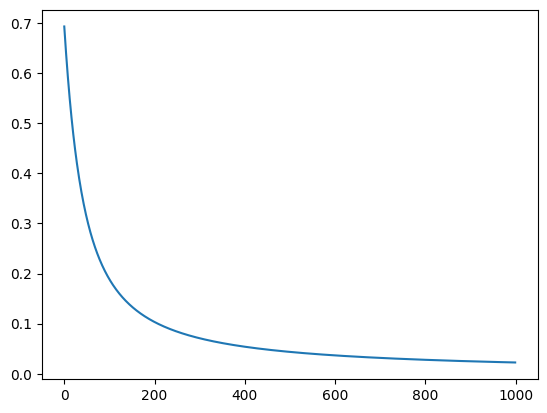

In [44]:
plt.plot(loss_epoch)

In [46]:
loss_epoch[:5]

[0.6931471805599452,
 0.6791738018273867,
 0.6656026656122682,
 0.6524219730269933,
 0.6396201167073763]

In [48]:
weights #W[0], W[1], W[2]

array([-0.03721134, -1.96064159,  2.18144543])

In [49]:
# Eqn of line => W1X + W2Y + W0 = 0
# y = -(W1X + W0)/W2

In [50]:
X = np.arange(-20, 30) # We make X
Y = -(weights[1] * X + weights[0])/weights[2]

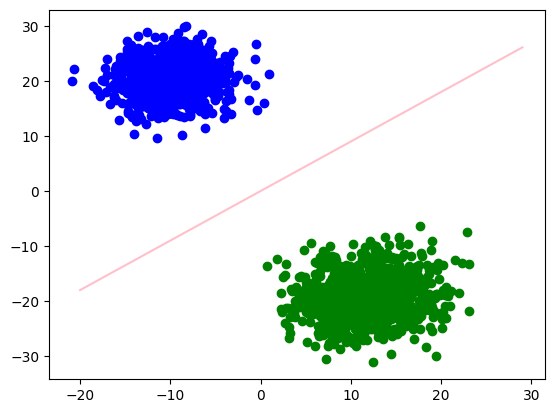

In [51]:
plt.scatter(dist_1[:, 0], dist_1[:, 1], c = 'green')
plt.scatter(dist_2[:, 0], dist_2[:, 1], c = 'blue')
plt.plot(X, Y, color = 'pink')

In [53]:
def predict(X, weights):
    pred = hypothesis(X, weights)
    if pred>0.5:
        return 1
    else:
        return 0

In [55]:
print(predict(test_X[0], weights), test_Y[0])

1 1.0


In [56]:
# We use distance formula to predict the accuracy of our linear model previously, we use accuracy models

In [61]:
corr = 0

for i in range(test_X.shape[0]):
    pred = predict(test_X[i], weights)
    if pred == test_Y[i]:
        corr += 1
print(corr/test_X.shape[0])    # accuracy = (correctAns)/(totalAns)

1.0
